In [11]:
# for data manipulation and analysis
import pandas as pd

# Writing to a CSV File
import csv

# for better display
from IPython.display import display

# for vizualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Numerical computing
import numpy as np

import math

In [53]:
def wrangle(filepath):
    # Load data
    df = pd.read_excel(filepath) 

    # Drop columns with with >50% missing values
    df.drop(columns=["Individuals using the Internet (% of population)", 
                 "Unemployment (% of total labor force) (modeled ILO estimate)"], inplace=True)

    # Sort by Country and Year to maintain chronological order 
    # Apply forward fill within each country
    df.sort_values(["Country Name", "Year"], inplace=True)
    df["GDP (USD)"] = df.groupby("Country Name")["GDP (USD)"].ffill()

    # Forward fill
    df[["Birth rate, crude (per 1,000 people)", 
    "Death rate, crude (per 1,000 people)", 
    "Life expectancy at birth (years)"]] = (
    df.groupby("Country Name")[["Birth rate, crude (per 1,000 people)", 
                                "Death rate, crude (per 1,000 people)", 
                                "Life expectancy at birth (years)"]].ffill()
    )

    
    df[["Infant mortality rate (per 1,000 live births)", 
    "GDP per capita (USD)", 
    "Population density (people per sq. km of land area)"]] = (
    df.groupby("Country Name")[["Infant mortality rate (per 1,000 live births)", 
                                "GDP per capita (USD)", 
                                "Population density (people per sq. km of land area)"]].ffill()
    )

    # forward fill for Electricity power consumption
    df["Electric power consumption (kWh per capita)"] = df.groupby("Country Name")["Electric power consumption (kWh per capita)"].ffill()
    # backward fill 
    df["Electric power consumption (kWh per capita)"] = df.groupby("Country Name")["Electric power consumption (kWh per capita)"].bfill()



    # Drop rows where 'Country Name' has no recorded gdp
    df = df[~df["Country Name"].isin(countries_with_no_gdp)]

    # Drop Number of countries with no birth/death rate data
    df = df[~df["Country Name"].isin(['Northern Mariana Islands', 'Turks and Caicos Islands', 'Tuvalu'])]

    #Interpolation
    df.loc[:, "Infant mortality rate (per 1,000 live births)"] = (
    df.groupby("Country Name")["Infant mortality rate (per 1,000 live births)"]
    .transform(lambda x: x.interpolate(method="linear"))
    )

    # Backward fill
    df[['Life expectancy at birth (years)', 'Population density (people per sq. km of land area)']] = \
    df[['Life expectancy at birth (years)', 'Population density (people per sq. km of land area)']].bfill()


    return df  


In [18]:
filepath = r"C:\Users\KINGLEY EYO\Desktop\World Bank Data\WorldBank.xlsx"
df = wrangle(filepath)

In [19]:
print(df["GDP (USD)"].isna().sum())


2382


In [20]:
df[df["GDP (USD)"].isna()][["Country Name", "Year", "GDP (USD)"]].sort_values("Country Name")


,Country Name,Year,GDP (USD)
117,Albania,1960,NaN
94,Albania,1983,NaN
96,Albania,1981,NaN
97,Albania,1980,NaN
98,Albania,1979,NaN
...,...,...,...
12329,"Yemen, Rep.",1961,NaN
12330,"Yemen, Rep.",1960,NaN
12302,"Yemen, Rep.",1988,NaN
12317,"Yemen, Rep.",1973,NaN


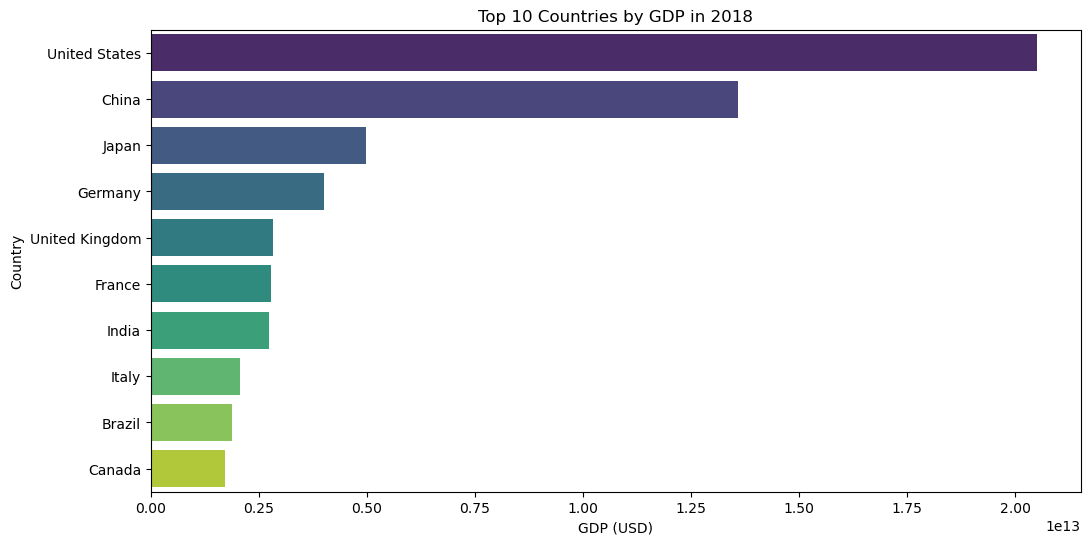

In [21]:
df_2018 = df[df["Year"] == 2018].nlargest(10, "GDP (USD)")


plt.figure(figsize=(12, 6))
sns.barplot(data=df_2018, y="Country Name", x="GDP (USD)", hue="Country Name", palette="viridis")
plt.xlabel("GDP (USD)")
plt.ylabel("Country")
plt.title("Top 10 Countries by GDP in 2018")
plt.show()


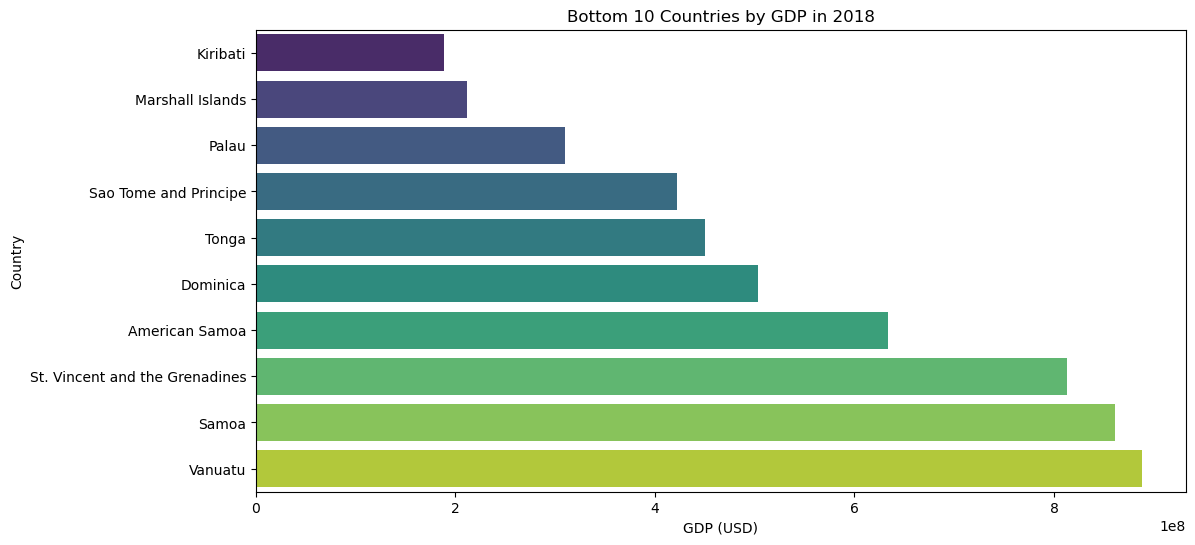

In [22]:
df_2018 = df[df["Year"] == 2018].nsmallest(10, "GDP (USD)")


plt.figure(figsize=(12, 6))
sns.barplot(data=df_2018, y="Country Name", x="GDP (USD)", hue="Country Name", palette="viridis")
plt.xlabel("GDP (USD)")
plt.ylabel("Country")
plt.title("Bottom 10 Countries by GDP in 2018")
plt.show()



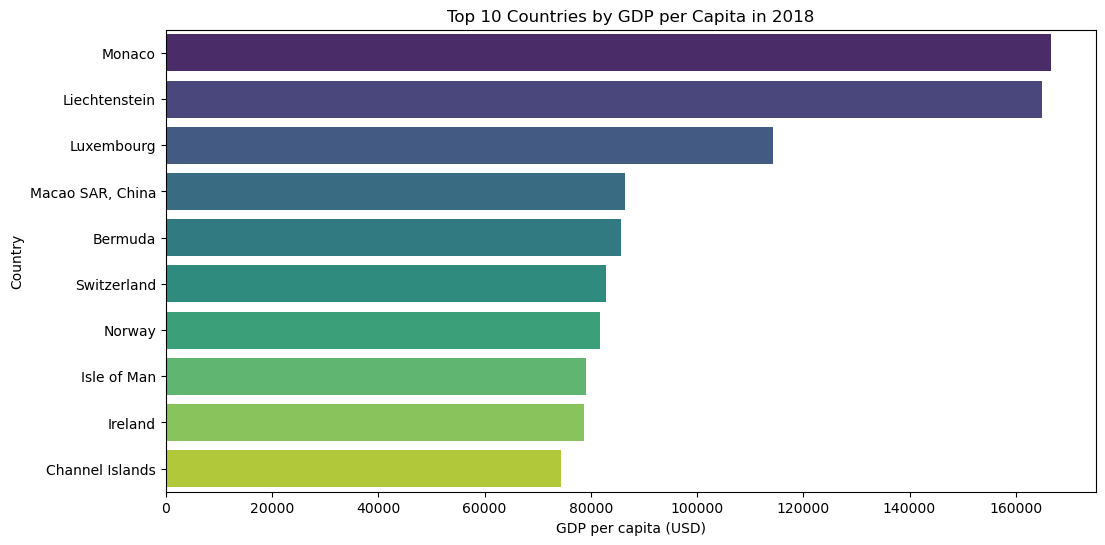

In [23]:
df_2018 = df[df["Year"] == 2018].nlargest(10, "GDP per capita (USD)")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_2018, y="Country Name", x="GDP per capita (USD)", hue="Country Name", palette="viridis")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Country")
plt.title("Top 10 Countries by GDP per Capita in 2018")
plt.show()


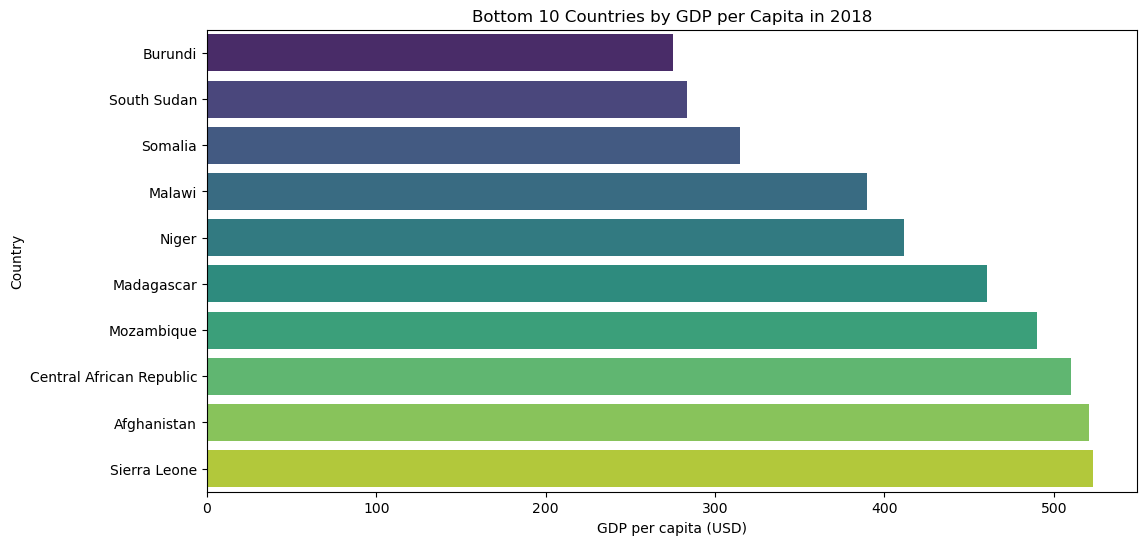

In [24]:
df_2018 = df[df["Year"] == 2018].nsmallest(10, "GDP per capita (USD)")


plt.figure(figsize=(12, 6))
sns.barplot(data=df_2018, y="Country Name", x="GDP per capita (USD)", hue="Country Name", palette="viridis")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Country")
plt.title("Bottom 10 Countries by GDP per Capita in 2018")
plt.show()


In [25]:
df[["Birth rate, crude (per 1,000 people)", 
    "Death rate, crude (per 1,000 people)", 
    "Life expectancy at birth (years)"]] = (
    df.groupby("Country Name")[["Birth rate, crude (per 1,000 people)", 
                                "Death rate, crude (per 1,000 people)", 
                                "Life expectancy at birth (years)"]].ffill()
)


In [26]:
df[["Infant mortality rate (per 1,000 live births)", 
    "GDP per capita (USD)", 
    "Population density (people per sq. km of land area)"]] = (
    df.groupby("Country Name")[["Infant mortality rate (per 1,000 live births)", 
                                "GDP per capita (USD)", 
                                "Population density (people per sq. km of land area)"]].ffill()
)


In [27]:
missing_gdp = df[df["GDP (USD)"].isna()].groupby("Country Name")["GDP (USD)"].count()
print(missing_gdp[missing_gdp == 0])  


Country Name
Albania                  0
American Samoa           0
Andorra                  0
Angola                   0
Antigua and Barbuda      0
                        ..
Vanuatu                  0
Vietnam                  0
Virgin Islands (U.S.)    0
West Bank and Gaza       0
Yemen, Rep.              0
Name: GDP (USD), Length: 104, dtype: int64


In [28]:
# Group by country and check if all GDP values are NaN
fully_missing_gdp = df.groupby("Country Name")["GDP (USD)"].apply(lambda x: x.isna().all())

# Filter to get only the countries where all GDP values are missing
countries_with_no_gdp = fully_missing_gdp[fully_missing_gdp].index

# Print the number of such countries
print(f"Number of countries with all GDP values missing: {len(countries_with_no_gdp)}")

# Print the list of affected countries
print(countries_with_no_gdp.tolist())


Number of countries with all GDP values missing: 0
[]


In [29]:
# Identify countries with all GDP values missing
fully_missing_gdp = df.groupby("Country Name")["GDP (USD)"].apply(lambda x: x.isna().all())

# Get the list of affected countries
countries_with_no_gdp = fully_missing_gdp[fully_missing_gdp].index

# Drop rows where 'Country Name' is in this list
df = df[~df["Country Name"].isin(countries_with_no_gdp)]

# Print confirmation
print(f"Dropped {len(countries_with_no_gdp)} countries with no GDP data.")


Dropped 0 countries with no GDP data.


In [30]:
df[["Birth rate, crude (per 1,000 people)", "Death rate, crude (per 1,000 people)"]] = (
    df.groupby("Country Name", group_keys=False)[["Birth rate, crude (per 1,000 people)", "Death rate, crude (per 1,000 people)"]]
    .apply(lambda x: x.interpolate(method="linear").bfill().ffill())  # Backward fill first, then forward fill
)


In [31]:
print(df[["Birth rate, crude (per 1,000 people)", "Death rate, crude (per 1,000 people)"]].isna().sum())


Birth rate, crude (per 1,000 people)    0
Death rate, crude (per 1,000 people)    0
dtype: int64


C:\Users\KINGLEY EYO\AppData\Local\Temp\ipykernel_3132\2495376547.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_birth, y="Country Name", x="Birth rate, crude (per 1,000 people)", palette="viridis")


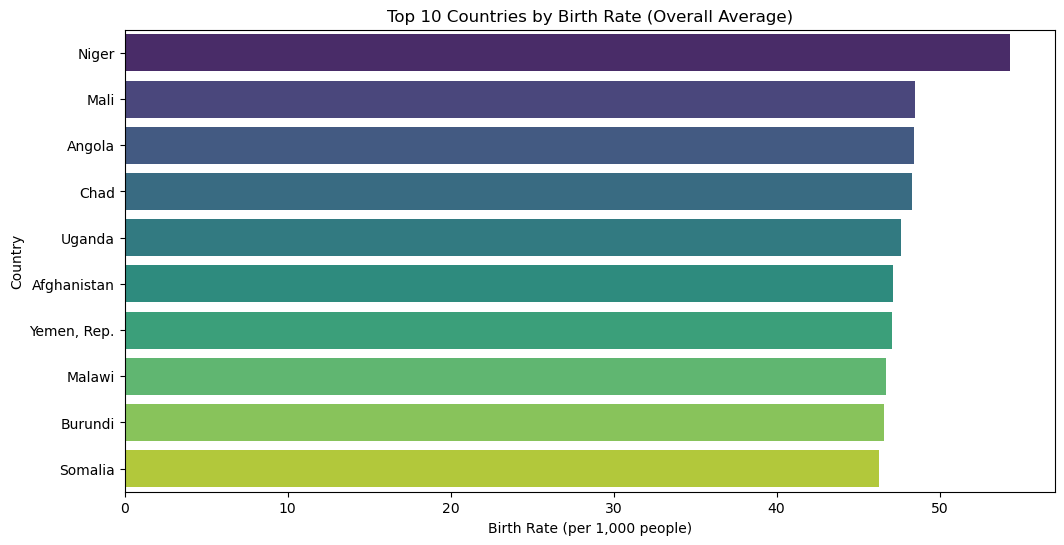

In [32]:
# Aggregate by country (average birth and death rates over all years)
df_grouped = df.groupby("Country Name", as_index=False).agg({
    "Birth rate, crude (per 1,000 people)": "mean",
    "Death rate, crude (per 1,000 people)": "mean"
})

### Top 10 Countries by Birth Rate (Crude, per 1,000 people)
df_top_birth = df_grouped.nlargest(10, "Birth rate, crude (per 1,000 people)")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_birth, y="Country Name", x="Birth rate, crude (per 1,000 people)", palette="viridis")
plt.xlabel("Birth Rate (per 1,000 people)")
plt.ylabel("Country")
plt.title("Top 10 Countries by Birth Rate (Overall Average)")
plt.show()

C:\Users\KINGLEY EYO\AppData\Local\Temp\ipykernel_3132\2036730276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bottom_birth, y="Country Name", x="Birth rate, crude (per 1,000 people)", palette="viridis")


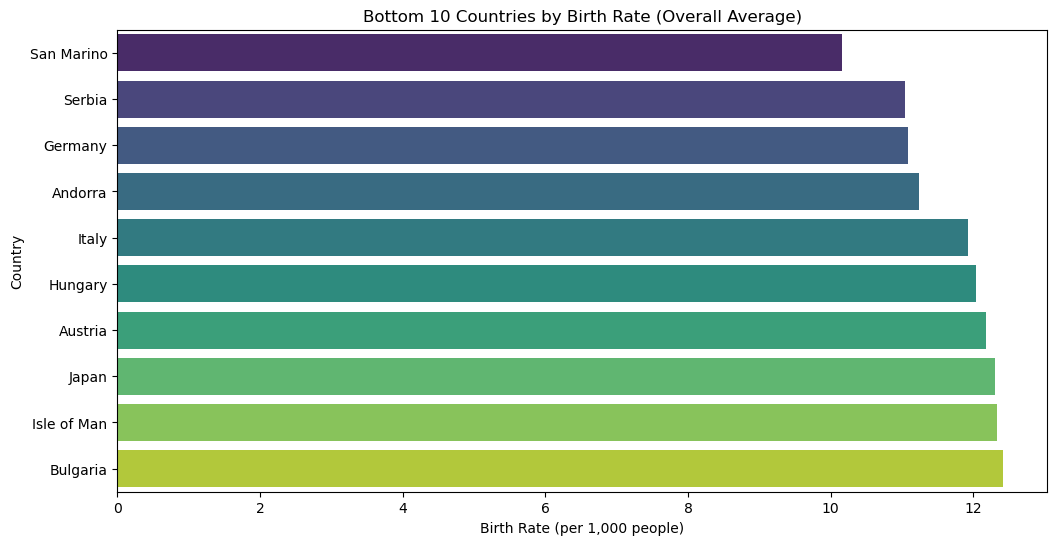

In [33]:
### Bottom 10 Countries by Birth Rate (Crude, per 1,000 people)
df_bottom_birth = df_grouped.nsmallest(10, "Birth rate, crude (per 1,000 people)")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_bottom_birth, y="Country Name", x="Birth rate, crude (per 1,000 people)", palette="viridis")
plt.xlabel("Birth Rate (per 1,000 people)")
plt.ylabel("Country")
plt.title("Bottom 10 Countries by Birth Rate (Overall Average)")
plt.show()

C:\Users\KINGLEY EYO\AppData\Local\Temp\ipykernel_3132\4189698787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_death, y="Country Name", x="Death rate, crude (per 1,000 people)", palette="magma")


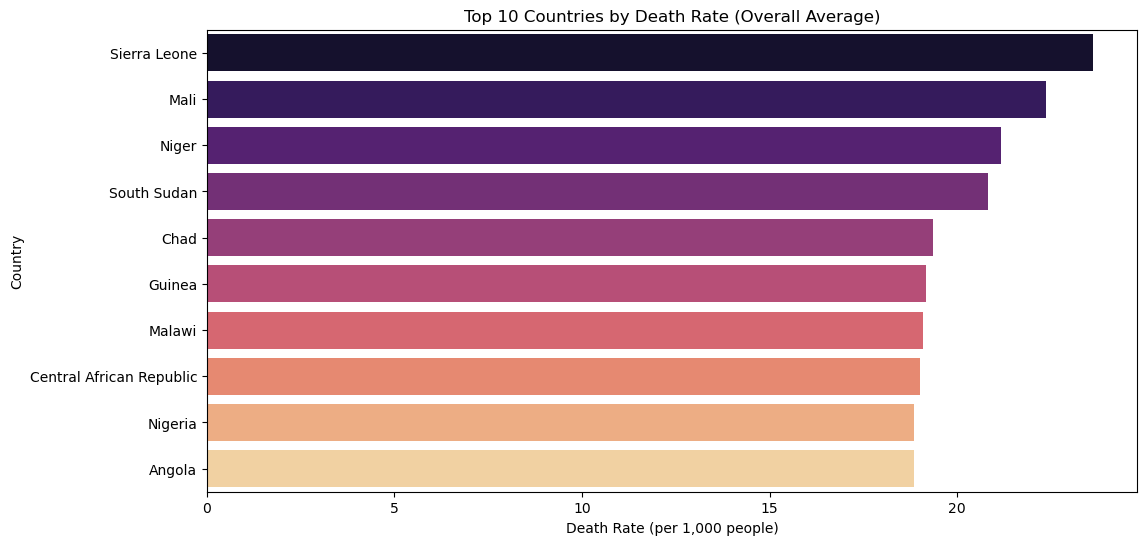

In [34]:
### Top 10 Countries by Death Rate (Crude, per 1,000 people)
df_top_death = df_grouped.nlargest(10, "Death rate, crude (per 1,000 people)")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_death, y="Country Name", x="Death rate, crude (per 1,000 people)", palette="magma")
plt.xlabel("Death Rate (per 1,000 people)")
plt.ylabel("Country")
plt.title("Top 10 Countries by Death Rate (Overall Average)")
plt.show()

C:\Users\KINGLEY EYO\AppData\Local\Temp\ipykernel_3132\2143967534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bottom_death, y="Country Name", x="Death rate, crude (per 1,000 people)", palette="magma")


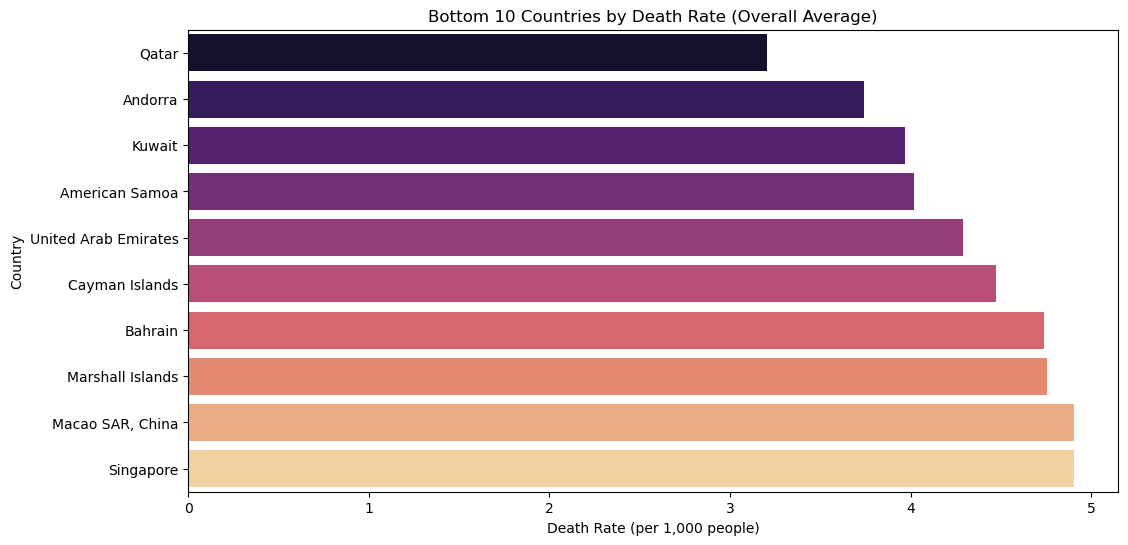

In [35]:
### Bottom 10 Countries by Death Rate (Crude, per 1,000 people)
df_bottom_death = df_grouped.nsmallest(10, "Death rate, crude (per 1,000 people)")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_bottom_death, y="Country Name", x="Death rate, crude (per 1,000 people)", palette="magma")
plt.xlabel("Death Rate (per 1,000 people)")
plt.ylabel("Country")
plt.title("Bottom 10 Countries by Death Rate (Overall Average)")
plt.show()


In [36]:
# Identify countries where both columns are completely missing
missing_birth_death = df.groupby("Country Name")[
    ["Birth rate, crude (per 1,000 people)", "Death rate, crude (per 1,000 people)"]
].apply(lambda x: x.isna().all()).all(axis=1)

# Get list of affected countries
countries_with_no_birth_death = missing_birth_death[missing_birth_death].index.tolist()

# Print results
print(f"Number of countries with no birth/death rate data: {len(countries_with_no_birth_death)}")
print(countries_with_no_birth_death)


Number of countries with no birth/death rate data: 0
[]


C:\Users\KINGLEY EYO\AppData\Local\Temp\ipykernel_3132\1731432525.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bottom_infant_mortality, y="Country Name", x="Infant mortality rate (per 1,000 live births)", palette="magma")


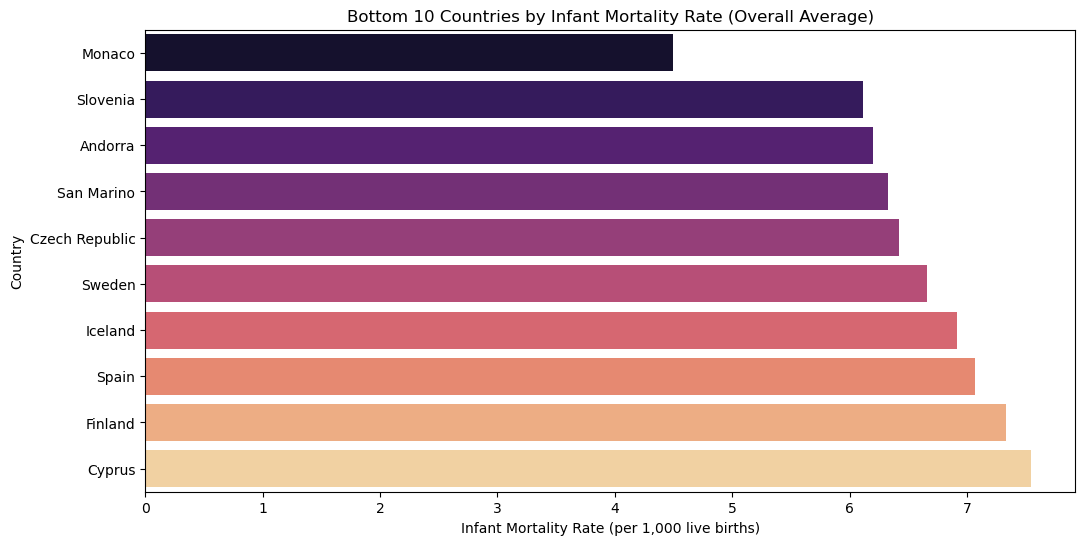

In [37]:
# Aggregate by country (calculate overall average)
df_grouped = df.groupby("Country Name", as_index=False).agg({
    "Infant mortality rate (per 1,000 live births)": "mean",
    "Life expectancy at birth (years)": "mean",
    "Population density (people per sq. km of land area)": "mean"
})

### Bottom 10 Countries by Infant Mortality Rate (Lower is better)
df_bottom_infant_mortality = df_grouped.nsmallest(10, "Infant mortality rate (per 1,000 live births)")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_bottom_infant_mortality, y="Country Name", x="Infant mortality rate (per 1,000 live births)", palette="magma")
plt.xlabel("Infant Mortality Rate (per 1,000 live births)")
plt.ylabel("Country")
plt.title("Bottom 10 Countries by Infant Mortality Rate (Overall Average)")
plt.show()

C:\Users\KINGLEY EYO\AppData\Local\Temp\ipykernel_3132\3521464281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bottom_life_expectancy, y="Country Name", x="Life expectancy at birth (years)", palette="magma")


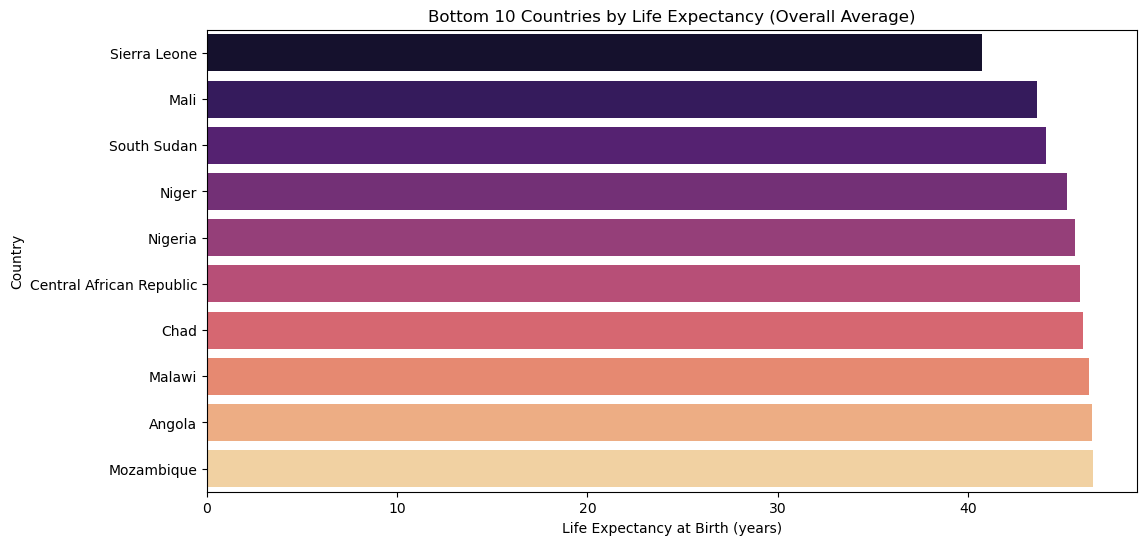

In [47]:
### Bottom 10 Countries by Life Expectancy (Lower life expectancy)
df_bottom_life_expectancy = df_grouped.nsmallest(10, "Life expectancy at birth (years)")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_bottom_life_expectancy, y="Country Name", x="Life expectancy at birth (years)", palette="magma")
plt.xlabel("Life Expectancy at Birth (years)")
plt.ylabel("Country")
plt.title("Bottom 10 Countries by Life Expectancy (Overall Average)")
plt.show()

C:\Users\KINGLEY EYO\AppData\Local\Temp\ipykernel_3132\1789188489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bottom_population_density, y="Country Name", x="Population density (people per sq. km of land area)", palette="magma")


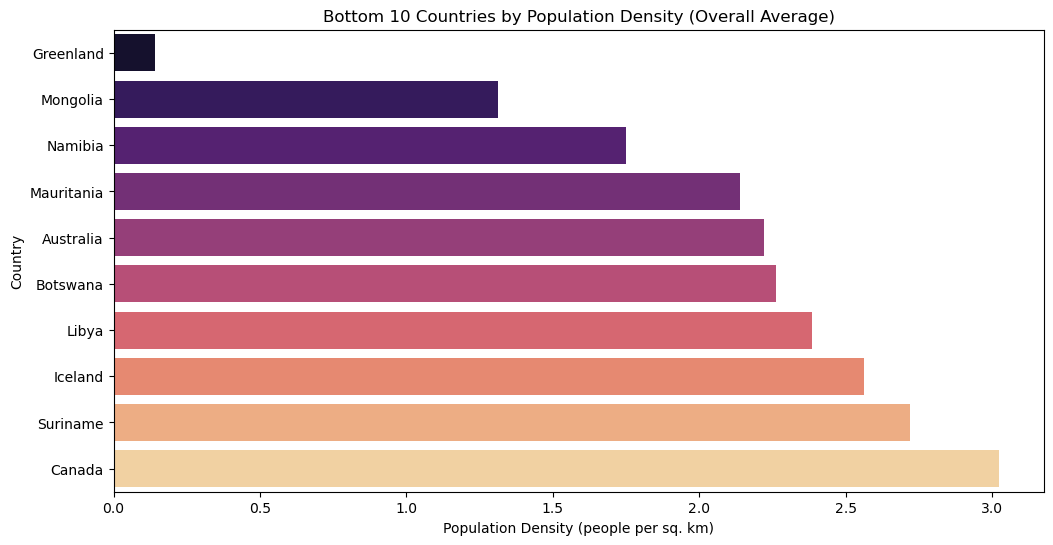

In [46]:
### Bottom 10 Countries by Population Density (Least densely populated)
df_bottom_population_density = df_grouped.nsmallest(10, "Population density (people per sq. km of land area)")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_bottom_population_density, y="Country Name", x="Population density (people per sq. km of land area)", palette="magma")
plt.xlabel("Population Density (people per sq. km)")
plt.ylabel("Country")
plt.title("Bottom 10 Countries by Population Density (Overall Average)")
plt.show()

In [40]:
df.loc[:, "Infant mortality rate (per 1,000 live births)"] = (
    df.groupby("Country Name")["Infant mortality rate (per 1,000 live births)"]
    .transform(lambda x: x.interpolate(method="linear"))
)

In [59]:
df.isnull().sum()

Country Name                                              0
Country Code                                              0
Region                                                    0
IncomeGroup                                               0
Year                                                      0
Birth rate, crude (per 1,000 people)                      0
Death rate, crude (per 1,000 people)                      0
Electric power consumption (kWh per capita)            3894
GDP (USD)                                              2382
GDP per capita (USD)                                   2382
Infant mortality rate (per 1,000 live births)          2189
Life expectancy at birth (years)                          0
Population density (people per sq. km of land area)       0
dtype: int64

In [45]:
missing_countries = df.groupby("Country Name")["Infant mortality rate (per 1,000 live births)"].apply(lambda x: x.isna().all())
print(missing_countries[missing_countries].index.tolist())


['American Samoa', 'Aruba', 'Bermuda', 'Cayman Islands', 'Channel Islands', 'Curacao', 'Faroe Islands', 'French Polynesia', 'Greenland', 'Guam', 'Hong Kong SAR, China', 'Isle of Man', 'Liechtenstein', 'Macao SAR, China', 'New Caledonia', 'Puerto Rico', 'Virgin Islands (U.S.)']


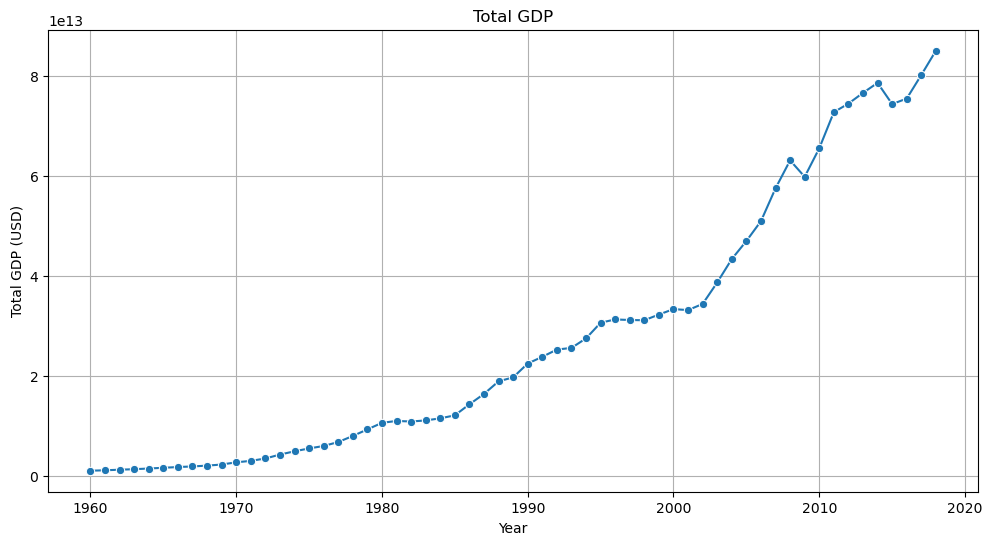

In [58]:
# Aggregate GDP by year
gdp_by_year = df.groupby("Year")["GDP (USD)"].sum()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=gdp_by_year.index, y=gdp_by_year.values, marker="o")

plt.xlabel("Year")
plt.ylabel("Total GDP (USD)")
plt.title("Total GDP")
plt.grid(True)


plt.show()

In [61]:
df.to_excel(r"C:\Users\KINGLEY EYO\Documents\World_bank_cleaned_data.xlsx", index=False)
